In [1]:
from scipy import stats as sts
from matplotlib import pyplot as plt
import numpy as np

In [2]:
def f(x):
    
    if x < -1:
        return sts.norm.pdf(x, loc = -4, scale = 0.5)
    else:
        return sts.norm.pdf(x, loc = 4, scale = 1)

In [3]:
def step(x, e):
    
    y = sts.norm.rvs(loc = x, scale = e, size = 1) # Choose next point
    
    if np.random.rand() < min(1, f(y)/f(x)): # Accept or not
        x = y

    return float(x)

In [21]:
def simulate(x, e, steps):
    
    randomwalk = []
    t = np.arange(steps + 1)
    
    for i in range(steps):
        x = step(x, e) # Do a walk for given number of steps
        if i%100 == 0: # Record each 100th step
            randomwalk.append(x)
    
    plt.figure(figsize = (10, 4))
    plt.hist(randomwalk, bins = 50, density = True)
    plt.title(f'Metropolis-Hastings random walk for {steps} steps')
    plt.show()

The value of e is 0.5.


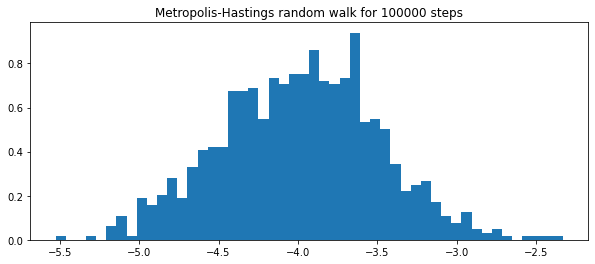

The value of e is 1.


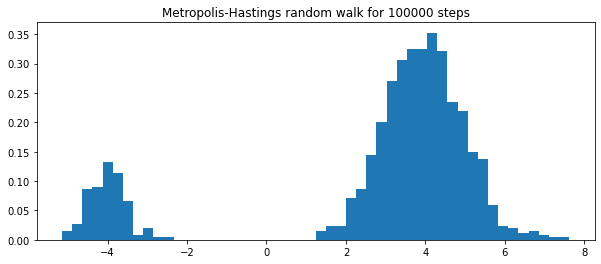

The value of e is 2.


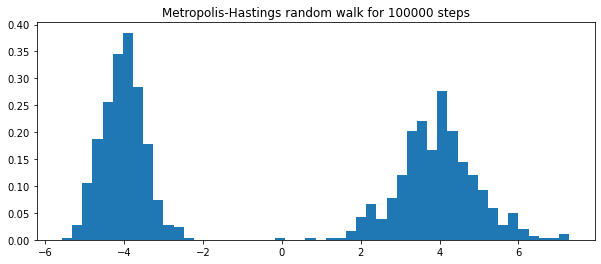

The value of e is 4.


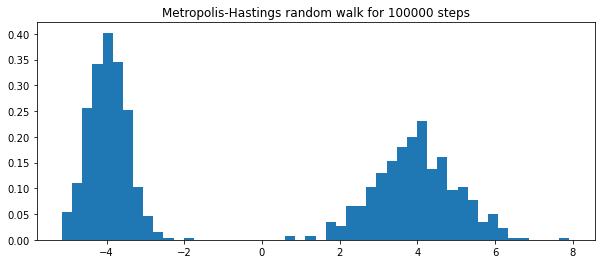

In [27]:
es = [0.5, 1, 2, 4]

for e in es:
    print(f'The value of e is {e}.')
    simulate(np.random.randint(-6, high = 6, size = 1), e, 100000)

### Comments:

1. What is the acceptance rate?

The acceptance rate is very high for the small values of e, due to the algorithm circling around and getting stuck on one of the distribution peaks, and much smaller for the large values of e due to resulting in a large step size - in this case, less steps get accepted, because the larger area is studied faster as well - including its parts where the density is close or equals to 0.

2. How correlated are the samples?

I don't know what the issue is, but the function provided bugged for me, so I couldn't use it.

3.  Which value of ε is the best?

The value that is between 2 and 4, due to not being too small and not being too large, and resulting in an optimal step size and acceptance rate that lead to equal and thorough exploration of both peaks.